In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt 

In [3]:
df=pd.read_csv('Desktop/pandas Demo/task2/supermarket_sales - Sheet1.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.dtypes.to_frame()

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


In [5]:
df.isna().sum().to_frame()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [6]:
mapping={'Normal':'Non Member'}
df['Customer type'].replace(mapping,inplace=True)
df['Customer type'].value_counts()

Customer type
Member        501
Non Member    499
Name: count, dtype: int64

# customer type graph
### we can see that the proportion of memebers and non memebers are almost the same 
#### we could try and find more ways to make more customers susbscribe to our membership


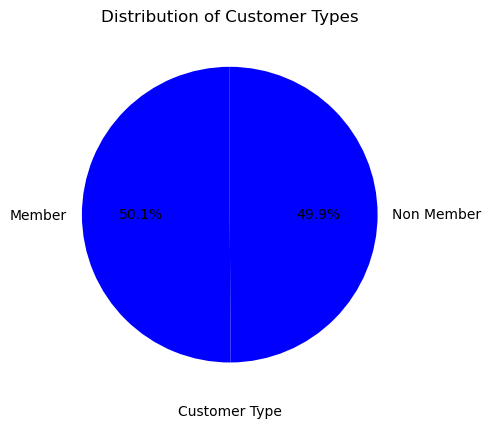

In [7]:
customer_type_count = df['Customer type'].value_counts()

plt.pie(customer_type_count, labels=customer_type_count.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'blue'])


plt.xlabel('Customer Type')

plt.title('Distribution of Customer Types')


plt.show()


# Gender graph 
## also our cusmtomers are divided equally between males and females there's no dominant gender  


Text(0, 0.5, 'FREQUENCY')

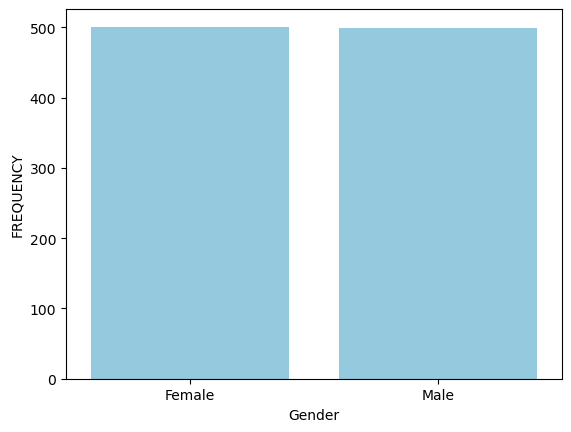

In [8]:
sns.countplot(data=df, x='Gender', color='skyblue')
plt.ylabel('FREQUENCY')

In [9]:
df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

# Representation of our product lines prucheased by which geneder 
## each product is kinda bought equally by each gender 
#### but we see that males buy more health and beauty products way more than females which is surprising by nature 


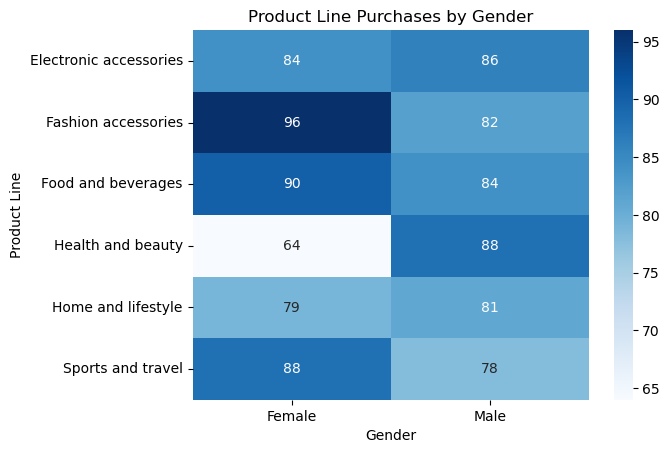

In [10]:

cross_tab = pd.crosstab(df['Product line'], df['Gender'])


sns.heatmap(cross_tab, cmap='Blues', annot=True, fmt='d')


plt.xlabel('Gender')
plt.ylabel('Product Line')
plt.title('Product Line Purchases by Gender')


plt.show()


In [11]:
cross_tab

Gender,Female,Male
Product line,,
Electronic accessories,84,86
Fashion accessories,96,82
Food and beverages,90,84
Health and beauty,64,88
Home and lifestyle,79,81
Sports and travel,88,78


In [11]:
df['Quantity'].value_counts()


Quantity
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: count, dtype: int64

## proportion of each product line 
### each product is  almost equally bought based on the graph below 


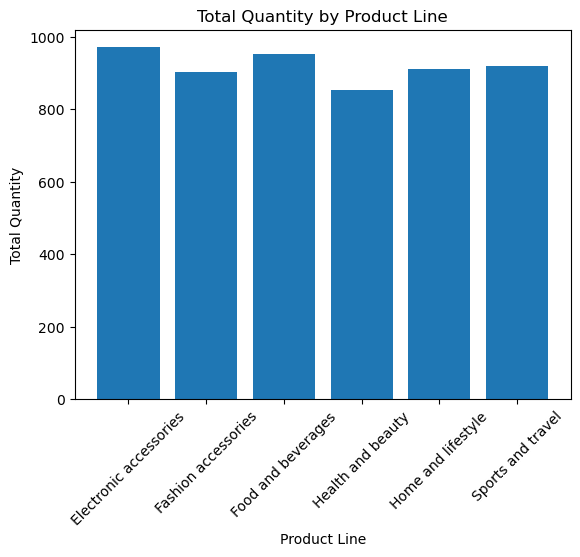

In [12]:
total_quantity = df.groupby('Product line')['Quantity'].sum()

plt.bar(total_quantity.index, total_quantity)


plt.xlabel('Product Line')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Product Line')


plt.xticks(rotation=45)


plt.show()



In [7]:

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [8]:
df['Date'] 

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

## Representation of preferred payment method use
### they are all equal except credit cards being slightly used less 

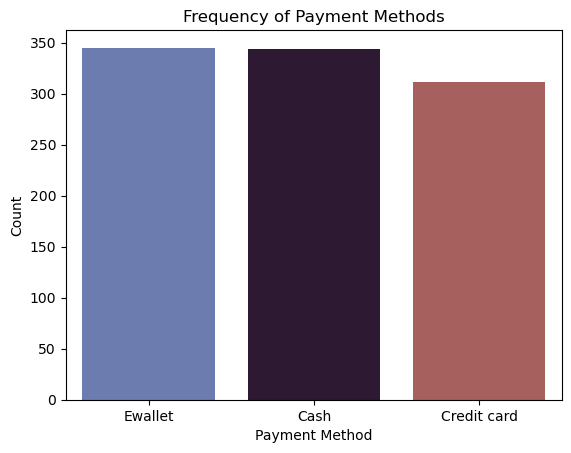

In [14]:

sns.countplot(data=df, x='Payment',palette='twilight')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Frequency of Payment Methods')

plt.show()


In [16]:
df_sorted = df.sort_values(by='Date')

## graph for all the ratings we got 
### we see most ratings are in the 6 to 7 range 




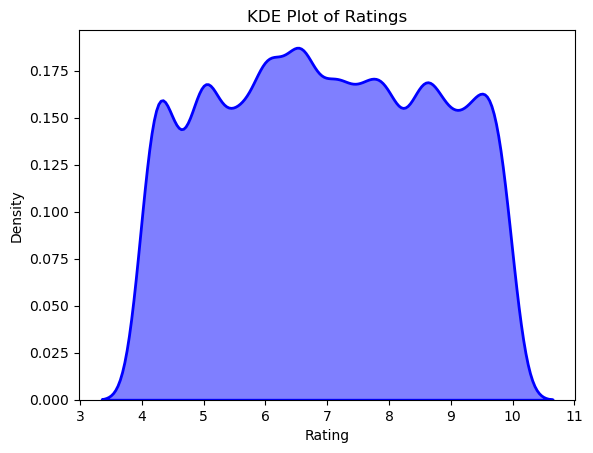

In [15]:

sns.kdeplot(data=df['Rating'], color='blue', linestyle='-', linewidth=2, fill=True, alpha=0.5, bw_adjust=0.5)


plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('KDE Plot of Ratings')


plt.show()



### we can see that all our product lines cost of manufacture are close with home& lifestyle are slightly more expensive to make 
#### the means of all our product lines are extremely close too 


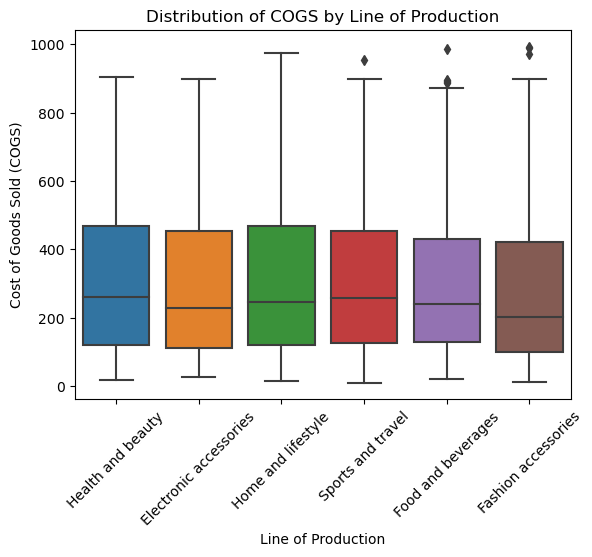

In [16]:

sns.boxplot(data=df, x='Product line', y='cogs')


plt.xlabel('Line of Production')
plt.ylabel('Cost of Goods Sold (COGS)')
plt.title('Distribution of COGS by Line of Production')


plt.xticks(rotation=45)


plt.show()


## total earnings of each brach 
#### they all preform the same


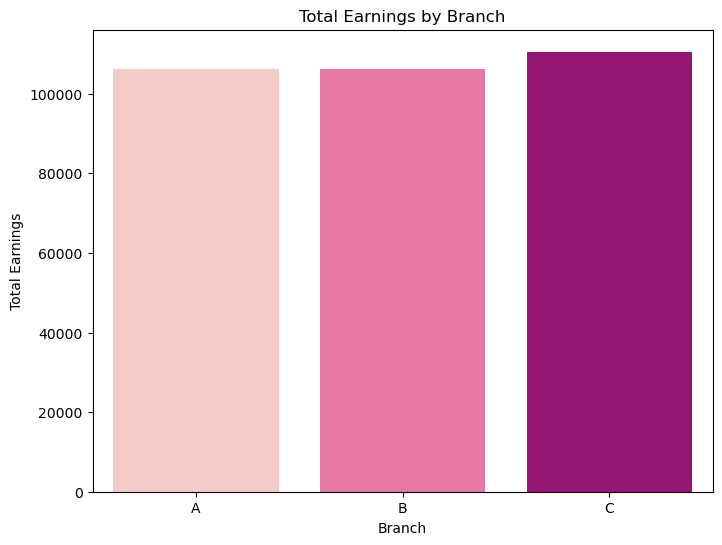

In [17]:



total_earnings_by_branch = df.groupby('Branch')['Total'].sum().reset_index()


plt.figure(figsize=(8, 6))  
sns.barplot(data=total_earnings_by_branch, x='Branch', y='Total', palette='RdPu')

plt.xlabel('Branch')
plt.ylabel('Total Earnings')
plt.title('Total Earnings by Branch')


plt.show()


# our total income in each month 
### we see we made most profit in january 

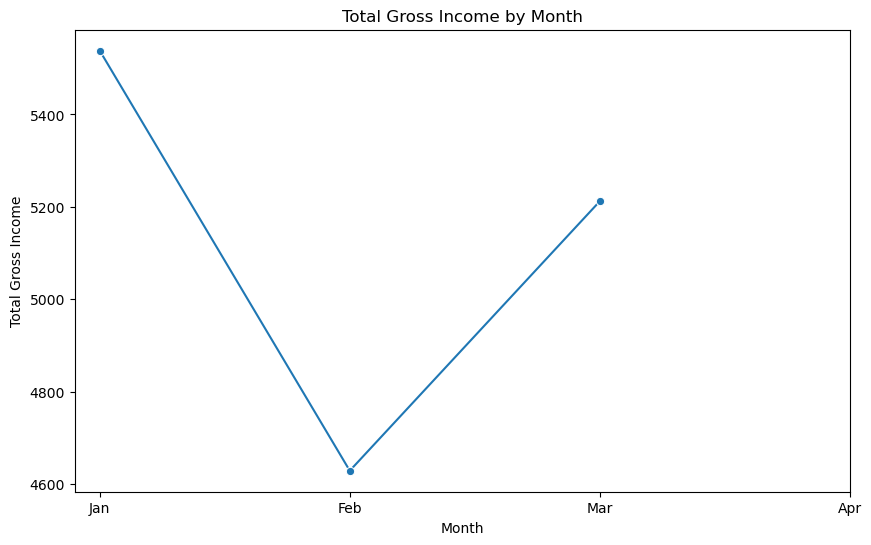

In [17]:

df['month'] = df['Date'].dt.month

monthly_income = df.groupby('month')['gross income'].sum().reset_index()

plt.figure(figsize=(10, 6))  
sns.lineplot(data=monthly_income, x='month', y='gross income', marker='o')

plt.xlabel('Month')
plt.ylabel('Total Gross Income')
plt.title('Total Gross Income by Month')

plt.xticks(range(1,5), ['Jan', 'Feb', 'Mar','Apr'])

plt.show()

